In [92]:
import pandas as pd
import numpy as np
import os 

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from collections import Counter

In [94]:
PCOS_inf = pd.read_csv('PCOS_infertility.csv')
PCOS_woinf = pd.read_csv ('PCOS_data_without_infertility.csv')
PCOS_woinf

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [95]:
#Merging the two files as per patient file no.
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')
print(data.info())

#Dropping the repeated features after merging
data =data.drop(['Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y','Patient File No.','Sl. No', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)','TSH (mIU/L)','PRL(ng/mL)','Vit D3 (ng/mL)','PRG(ng/mL)','RBS(mg/dl)','Follicle No. (L)','Follicle No. (R)','Endometrium (mm)','Hb(g/dl)','Avg. F size (L) (mm)','Avg. F size (R) (mm)','RR (breaths/min)','Unnamed: 44','BP _Systolic (mmHg)','BP _Diastolic (mmHg)'], axis=1)

#Taking a look at the dataset
data.head()
data['Waist:Hip Ratio']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sl. No                    541 non-null    int64  
 1   Patient File No.          541 non-null    int64  
 2   PCOS (Y/N)                541 non-null    int64  
 3    Age (yrs)                541 non-null    int64  
 4   Weight (Kg)               541 non-null    float64
 5   Height(Cm)                541 non-null    float64
 6   BMI                       541 non-null    float64
 7   Blood Group               541 non-null    int64  
 8   Pulse rate(bpm)           541 non-null    int64  
 9   RR (breaths/min)          541 non-null    int64  
 10  Hb(g/dl)                  541 non-null    float64
 11  Cycle(R/I)                541 non-null    int64  
 12  Cycle length(days)        541 non-null    int64  
 13  Marraige Status (Yrs)     540 non-null    float64
 14  Pregnant(Y

0      0.83
1      0.84
2      0.90
3      0.86
4      0.81
       ... 
536    0.93
537    0.94
538    0.93
539    0.93
540    0.96
Name: Waist:Hip Ratio, Length: 541, dtype: float64

In [96]:
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   Cycle(R/I)             541 non-null    int64  
 8   Cycle length(days)     541 non-null    int64  
 9   Marraige Status (Yrs)  540 non-null    float64
 10  Pregnant(Y/N)          541 non-null    int64  
 11  No. of aborptions      541 non-null    int64  
 12  FSH(mIU/mL)            541 non-null    float64
 13  LH(mIU/mL)             541 non-null    float64
 14  FSH/LH                 541 non-null    float64
 15  Hip(in

In [98]:
data=data.fillna(0)
# checking for null values
data.isnull().sum()

PCOS (Y/N)               0
 Age (yrs)               0
Weight (Kg)              0
Height(Cm)               0
BMI                      0
Blood Group              0
Pulse rate(bpm)          0
Cycle(R/I)               0
Cycle length(days)       0
Marraige Status (Yrs)    0
Pregnant(Y/N)            0
No. of aborptions        0
FSH(mIU/mL)              0
LH(mIU/mL)               0
FSH/LH                   0
Hip(inch)                0
Waist(inch)              0
Waist:Hip Ratio          0
Weight gain(Y/N)         0
hair growth(Y/N)         0
Skin darkening (Y/N)     0
Hair loss(Y/N)           0
Pimples(Y/N)             0
Fast food (Y/N)          0
Reg.Exercise(Y/N)        0
dtype: int64

In [99]:

#statistical data for each numerical column
data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),...,Hip(inch),Waist(inch),Waist:Hip Ratio,Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,156.484835,24.307579,13.802218,73.247689,2.560074,4.94085,7.666728,...,37.992606,33.841035,0.891627,0.377079,0.273567,0.306839,0.452865,0.489834,0.513863,0.247689
std,0.469615,5.411006,11.028287,6.033545,4.055129,1.840812,4.430285,0.901950,1.49202,4.810733,...,3.967920,3.596894,0.046135,0.485104,0.446202,0.461609,0.498234,0.500359,0.500270,0.432070
min,0.000000,20.000000,31.000000,137.000000,12.400000,11.000000,13.000000,2.000000,0.00000,0.000000,...,26.000000,24.000000,0.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,13.000000,72.000000,2.000000,4.00000,4.000000,...,36.000000,32.000000,0.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,14.000000,72.000000,2.000000,5.00000,7.000000,...,38.000000,34.000000,0.890000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,15.000000,74.000000,4.000000,5.00000,10.000000,...,40.000000,36.000000,0.930000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,5.000000,12.00000,30.000000,...,48.000000,47.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


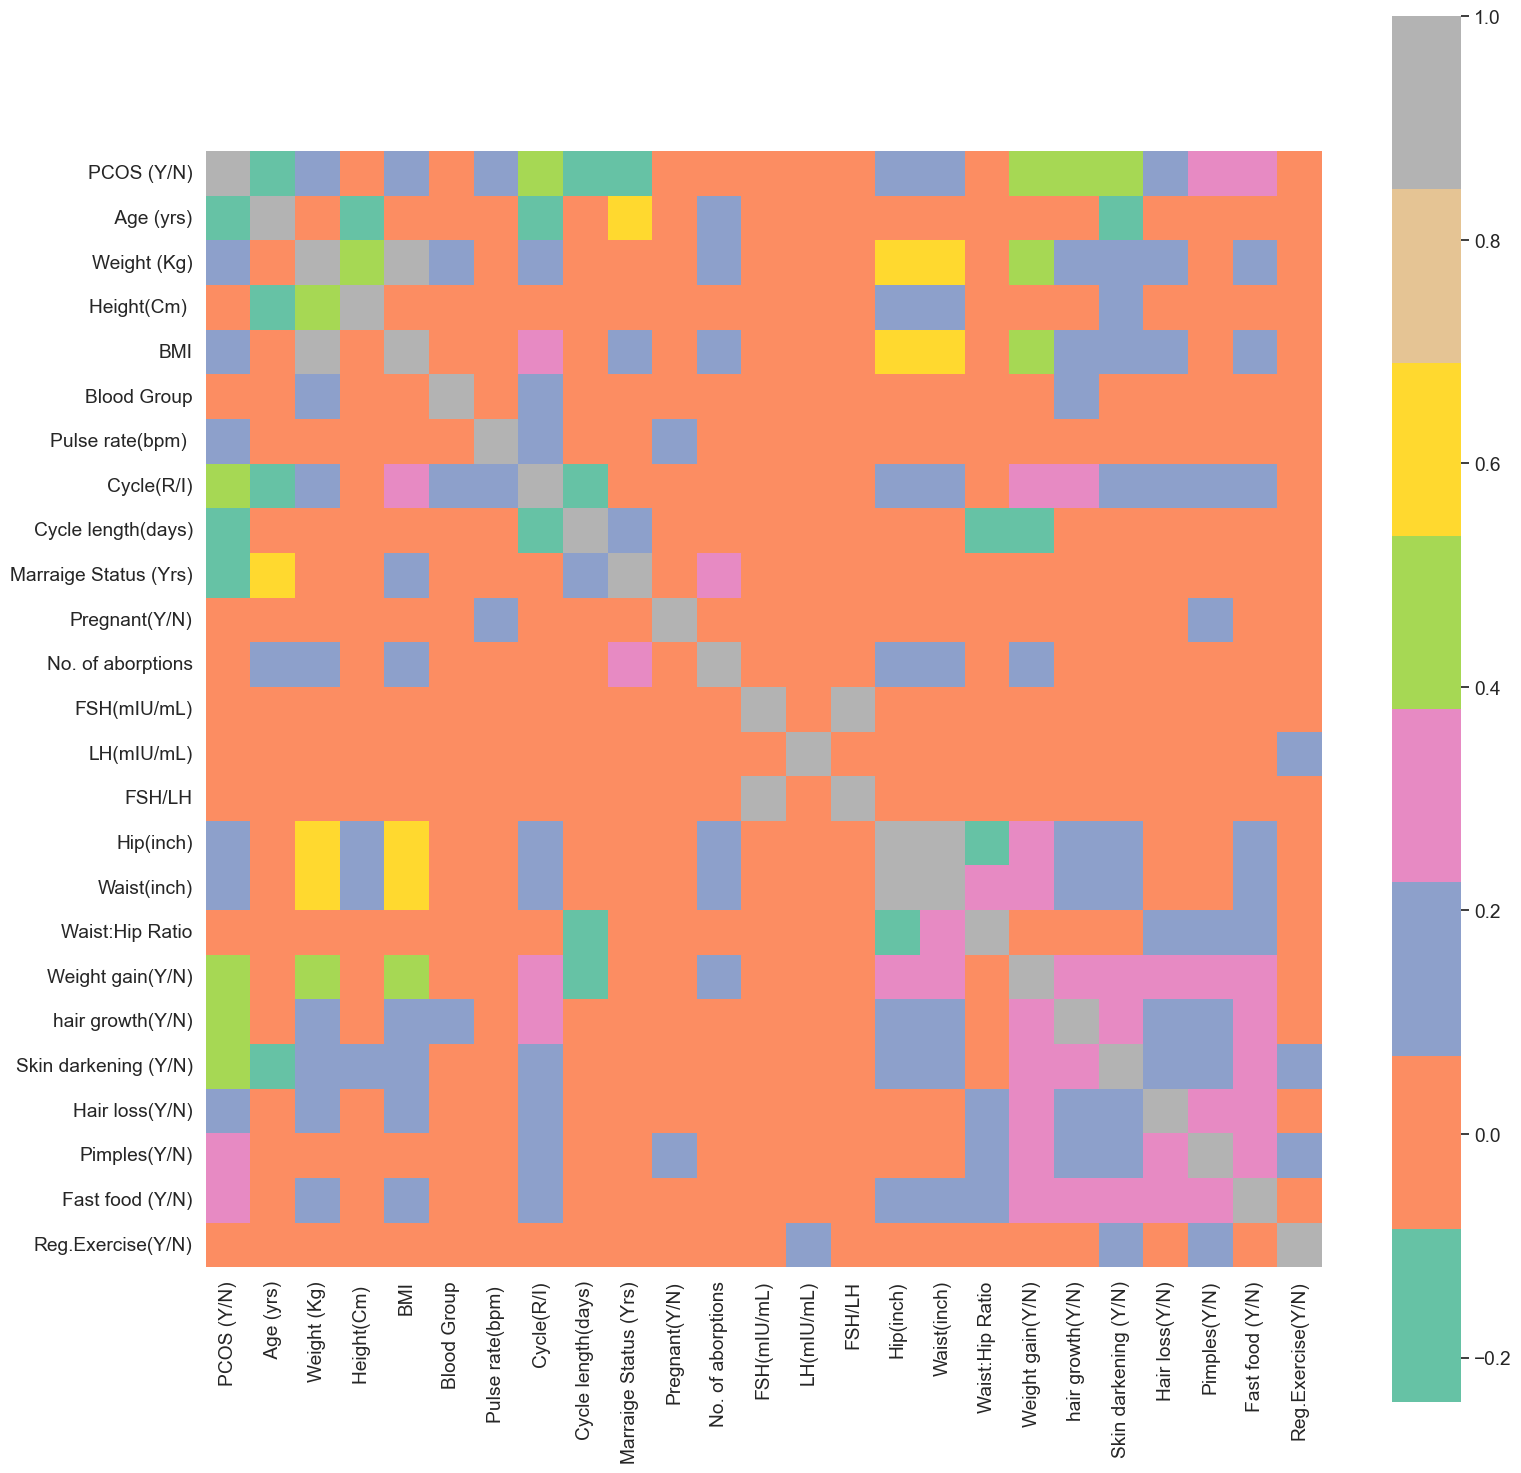

In [100]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Set2", square=True);

In [101]:
#How all the features correlate with the PCOS
corrmat["PCOS (Y/N)"].sort_values (ascending=False)

PCOS (Y/N)               1.000000
Skin darkening (Y/N)     0.475733
hair growth(Y/N)         0.464667
Weight gain(Y/N)         0.441047
Cycle(R/I)               0.401644
Fast food (Y/N)          0.378720
Pimples(Y/N)             0.286077
Weight (Kg)              0.211938
BMI                      0.199697
Hair loss(Y/N)           0.172879
Waist(inch)              0.164598
Hip(inch)                0.162297
Pulse rate(bpm)          0.091821
Height(Cm)               0.068254
Reg.Exercise(Y/N)        0.065337
LH(mIU/mL)               0.063879
Blood Group              0.036433
Waist:Hip Ratio          0.012145
FSH/LH                  -0.018334
Pregnant(Y/N)           -0.027565
FSH(mIU/mL)             -0.030319
No. of aborptions       -0.057158
Marraige Status (Yrs)   -0.116652
 Age (yrs)              -0.168513
Cycle length(days)      -0.178480
Name: PCOS (Y/N), dtype: float64

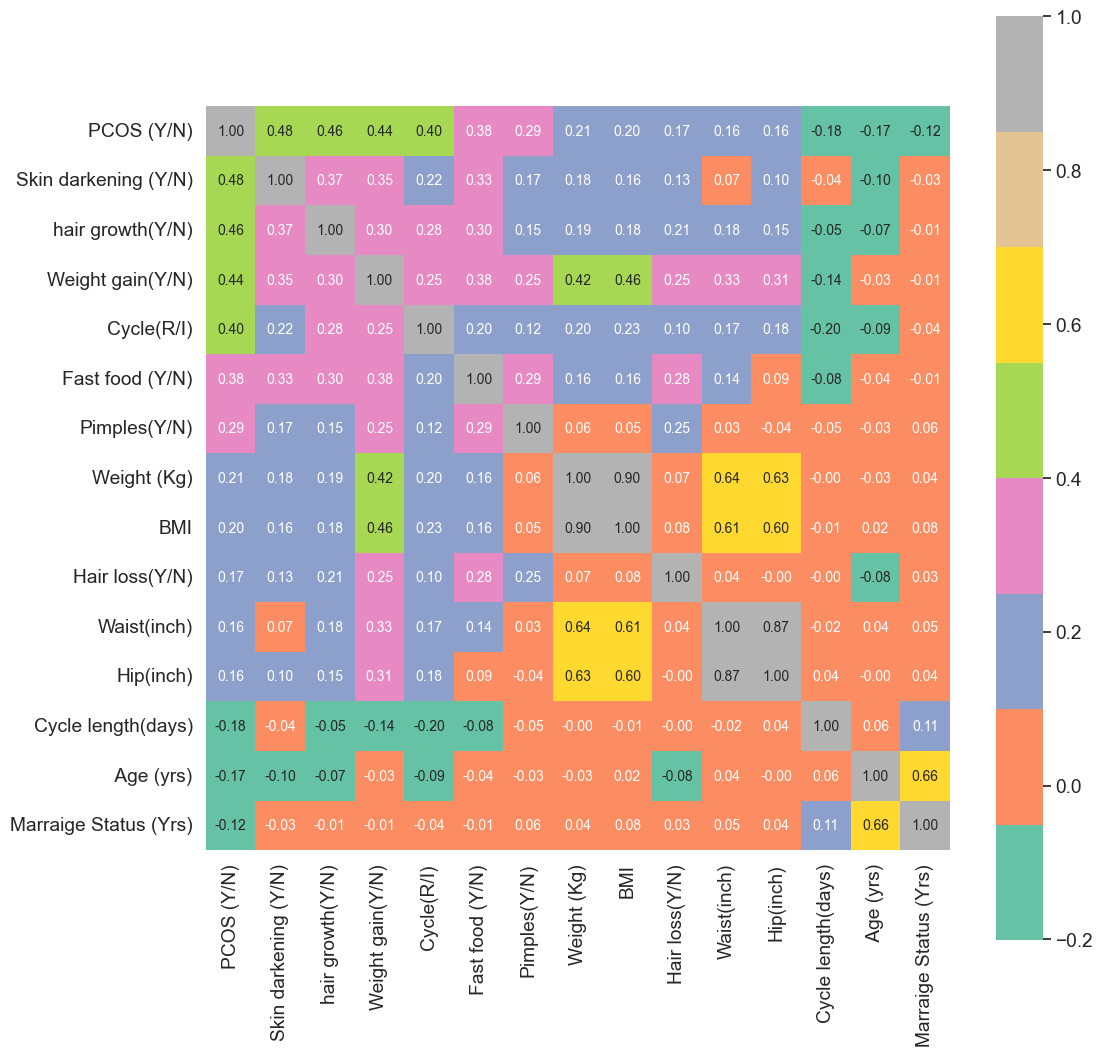

In [102]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Set2", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

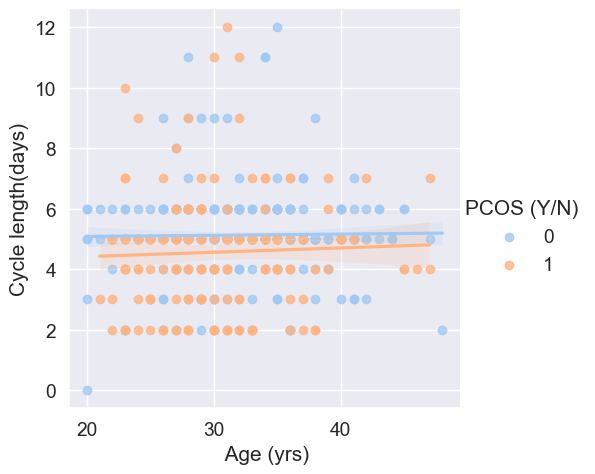

In [103]:
#Length of menstrual phase in PCOS vs normal
fig = sns.lmplot(data=data,x=" Age (yrs)",y="Cycle length(days)", hue ="PCOS (Y/N)", palette="pastel")
plt.show(fig)

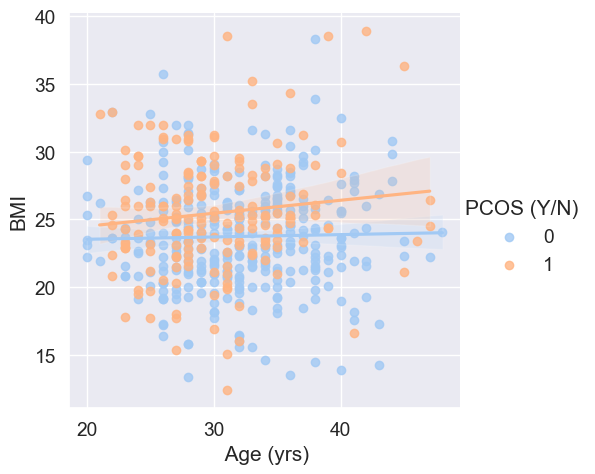

In [104]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig = sns.lmplot(data=data,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= "pastel")
plt.show(fig)

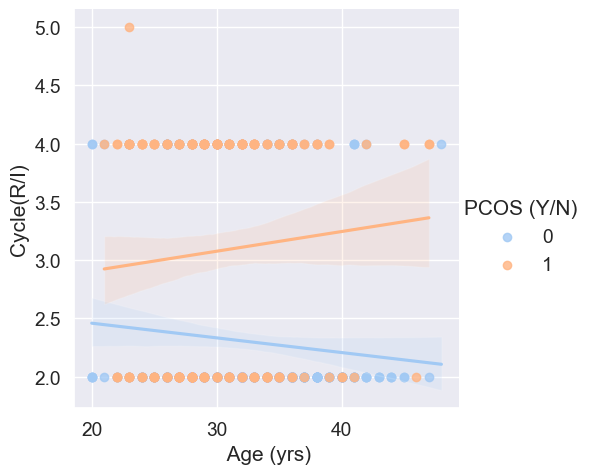

In [105]:
#cycle IR wrt age
sns.lmplot(data =data,x=" Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)", palette="pastel")
plt.show()

splitting numerical and categorical columns

In [106]:
numerical_cols = ["No. of aborptions", "Weight (Kg)" ,"Height(Cm) " ,"BMI" ,"Blood Group" ,"Pulse rate(bpm) " ,"Cycle length(days)" ,"Marraige Status (Yrs)" ,"Hip(inch)", "Waist(inch)", "Waist:Hip Ratio"]
categorical_cols = list(set(data.columns) - set(numerical_cols)- {"PCOS (Y/N)"})

In [107]:
numerical_cols

['No. of aborptions',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'Cycle length(days)',
 'Marraige Status (Yrs)',
 'Hip(inch)',
 'Waist(inch)',
 'Waist:Hip Ratio']

In [108]:
categorical_cols

['Fast food (Y/N)',
 'Weight gain(Y/N)',
 'hair growth(Y/N)',
 'LH(mIU/mL)',
 ' Age (yrs)',
 'Pregnant(Y/N)',
 'Pimples(Y/N)',
 'Cycle(R/I)',
 'FSH(mIU/mL)',
 'Reg.Exercise(Y/N)',
 'Skin darkening (Y/N)',
 'FSH/LH',
 'Hair loss(Y/N)']

In [109]:
#Assiging the features (X) and target(y)
X=data
y = data["PCOS (Y/N)"]

#Splitting the data into test and training sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [110]:
data_train, data_test = train_test_split(data, test_size = 0.5, random_state = 42)

#for merged dataset
merge_train,merge_test= train_test_split(data, test_size = 0.3, random_state = 42)

In [111]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the iris dataset
iris = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Create a logistic regression model and train it on the training data
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [112]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the Boston Housing dataset
boston = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test data and calculate metrics
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R^2 score:", r2)

Mean squared error: 0.03711379440797689
Root mean squared error: 0.1926494080135646
R^2 score: 0.9468960016420045


In [113]:
merge_test.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')

scaling numerical columns

In [114]:
#this is required because the numerical columns might have data 1 as well as 800. 
#in this case 800 may be considered as outlier. so we need to apply standard scaling to bring all the values in a particular range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def get_features_and_target_array(data, numerical_cols, categorical_cols, scaler):
  x_numeric_scaled = scaler.fit_transform(data[numerical_cols]) #it will take every data point of numerical column and it will transform it to -1 to 1 range
  x_categorical = data[categorical_cols].to_numpy() #categorical cols
  X = np.hstack((x_categorical, x_numeric_scaled)) #single array of the above two arrays so that it can directly be added to model
  y = data["PCOS (Y/N)"]
  return X, y

In [115]:
x_train, y_train = get_features_and_target_array(data_train, numerical_cols, categorical_cols, scaler)

In [116]:
print(data_train.columns)

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')


In [117]:
#without scaling

x_test=data_test.drop(columns=["PCOS (Y/N)"])
y_test=data_test['PCOS (Y/N)']
x_train=data_train.drop(columns=["PCOS (Y/N)"])
y_train=data_train['PCOS (Y/N)']

#for merged dataset
mx_test=merge_test.drop(columns=["PCOS (Y/N)"])
my_test=merge_test['PCOS (Y/N)']
mx_train=merge_train.drop(columns=["PCOS (Y/N)"])
my_train=merge_train['PCOS (Y/N)']

In [118]:
#with scaling
xs_train,ys_train=get_features_and_target_array(data_train, numerical_cols, categorical_cols, scaler)
xs_test,ys_test=get_features_and_target_array(data_test, numerical_cols, categorical_cols, scaler)

In [67]:
y_train

290    1
355    0
262    0
400    0
150    1
      ..
71     0
106    0
270    0
435    0
102    1
Name: PCOS (Y/N), Length: 270, dtype: int64

train

Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(mx_train,my_train)

LogisticRegression(max_iter=1000)

In [120]:
test_pred = clf.predict(mx_test)

In [121]:
from sklearn.metrics import mean_squared_error
mean_squared_error(my_test, test_pred)


0.15337423312883436

In [123]:
accuracy_score(my_test, test_pred)

0.8466257668711656

In [122]:
confusion_matrix(my_test, test_pred)

array([[101,   9],
       [ 16,  37]], dtype=int64)

Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dc_clf = DecisionTreeClassifier()
dc_clf.fit(mx_train, my_train)

dlf_pred = dc_clf.predict(mx_test)
print("Mean Squared Error:",mean_squared_error(my_test, dlf_pred))
print("Accuracy Score:",accuracy_score(my_test, dlf_pred))

Mean Squared Error: 0.3128834355828221
Accuracy Score: 0.6871165644171779


Support Vector Classifier

In [125]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(mx_train, my_train)

svm_pred = svm_clf.predict(mx_test)
print("Mean Squared Error:",mean_squared_error(my_test, svm_pred))
print("Accuracy Score:",accuracy_score(my_test, svm_pred))

Mean Squared Error: 0.32515337423312884
Accuracy Score: 0.6748466257668712


RandomForest

In [126]:
rfc = RandomForestClassifier()
rfc.fit(mx_train, my_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(mx_test)
accuracy = accuracy_score(my_test, pred_rfc)
print("Accuracy Score:",accuracy)

Accuracy Score: 0.7975460122699386


K-nearest neighbors classifier.

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

# Create KNeighborsClassifier instance
knn_clf = KNeighborsClassifier()

# Train the model
knn_clf.fit(mx_train, my_train)

# Make predictions
knn_pred = knn_clf.predict(mx_test)

# Calculate mean squared error
print("Mean Squared Error:", mean_squared_error(my_test, knn_pred))

# Calculate accuracy score
print("Accuracy Score:", accuracy_score(my_test, knn_pred))


Mean Squared Error: 0.37423312883435583
Accuracy Score: 0.6257668711656442


Gaussian Naive Bayes classifier

In [128]:
from sklearn.naive_bayes import GaussianNB

# Instantiate Gaussian Naive Bayes classifier
gnb_clf = GaussianNB()

# Train the model
gnb_clf.fit(mx_train, my_train)

# Make predictions
gnb_pred = gnb_clf.predict(mx_test)

# Evaluate the model
print(mean_squared_error(my_test, gnb_pred))
print(accuracy_score(my_test, gnb_pred))


0.3006134969325153
0.6993865030674846


C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

LR: 0.840943 (0.042624)
KNN: 0.765421 (0.052616)
DT: 0.752256 (0.070529)
NB: 0.776162 (0.066824)
RF: 0.831751 (0.030563)
SVM: 0.670976 (0.059596)


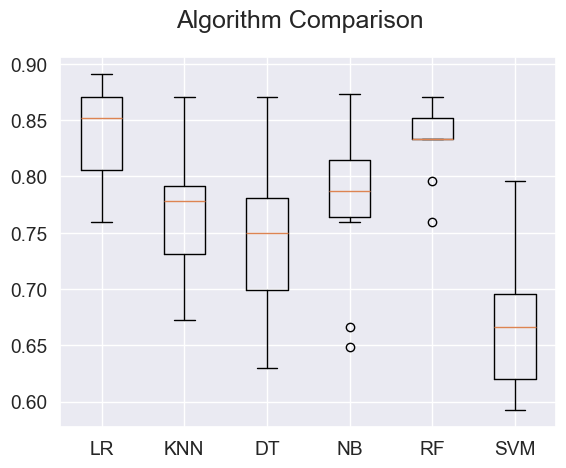

In [140]:
# Model Selection using Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.impute import SimpleImputer
#prepare configuration for cross validation test harness
x_numeric_scaled = scaler.fit_transform(data[numerical_cols]) #it will take every data point of numerical column and it will transform it to -1 to 1 range
x_categorical = data[categorical_cols].to_numpy() #categorical cols
X = np.hstack((x_categorical, x_numeric_scaled)) #single array of the above two arrays so that it can directly be added to model
y = data["PCOS (Y/N)"]


imputer = SimpleImputer(strategy='mean')  # Or 'median' depending on your data
X = imputer.fit_transform(X)
models= []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring= 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg=("%s: %f (%f)"%(name, cv_results.mean(), cv_results.std()))
    print(msg)


#boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [141]:
from sklearn.impute import SimpleImputer


# Load dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X= np.hstack((x_categorical, x_numeric_scaled))
Y=data["PCOS (Y/N)"]
#prepare configuration for cross validation test harness
imputer = SimpleImputer(strategy='mean')  # Or 'median' depending on your data
X = imputer.fit_transform(X)
#Comparing the accuaracies of different classifiers to fing the model best sulted for our PCOS predictor

model_list= ['Decision Tree', 'RandomForest', 'LogisticRegression', 'KNearestleighbours', 'GaussianNB','SVM']

random_state = 42

classifier = [DecisionTreeClassifier(random_state= random_state), RandomForestClassifier(random_state= random_state), LogisticRegression(random_state =random_state), KNeighborsClassifier(3), GaussianNB(),SVC()]

scores=[]

for name, clf in zip(model_list, classifier):
    clf.fit(X_train,y_train)
    score=clf.score(X_test,y_test)
    scores.append(score)

C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
scores

[0.7522935779816514,
 0.8073394495412844,
 0.8348623853211009,
 0.7522935779816514,
 0.6513761467889908,
 0.7064220183486238]

In [143]:
df = pd.DataFrame()
df['models'] = model_list
df['score'] = scores
df

,models,score
0,Decision Tree,0.752294
1,RandomForest,0.807339
2,LogisticRegression,0.834862
3,KNearestleighbours,0.752294
4,GaussianNB,0.651376
5,SVM,0.706422


In [144]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8348623853211009


C:\Users\Keerthi\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [145]:
print(f"Score in Test Data : {logreg.score(X_test,y_test)}")
cm = confusion_matrix(y_test, y_pred)
p_right = cm[0][0] + cm[1][1]
p_wrong = cm[0][1] + cm[1][0]

print(f"Right classification : {p_right}")
print(f"Wrong classification : {p_wrong}")
cm

Score in Test Data : 0.8348623853211009
Right classification : 91
Wrong classification : 18


array([[71,  6],
       [12, 20]], dtype=int64)

In [146]:
#Fitting the RandomForestClassifier to the training set
rfc = RandomForestClassifier()
r = rfc.fit(X_train, y_train)

#making predection and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

print(pred_rfc)
joblib.dump(rfc, 'rfc.joblib')

0.8165137614678899
[1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0]


['rfc.joblib']

In [147]:
import pickle

In [148]:
pickle.dump(r,open("model.pkl", "wb"))
load = pickle.load(open("model.pkl", "rb"))
res = load.score(X_test, y_test)
res

0.8165137614678899

In [149]:
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Pulse rate(bpm) ', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')